
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
##from google.colab import drive
##drive.mount('/content/drive')

!ls


HW_2_1_Аналіз_ознак_для_побудови_лінійної_регресії.ipynb
Homework_statistic_basics.ipynb
UPD_Credit_EDA.ipynb
application_data_processed.zip
medical-charges.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


In [6]:
#medical_df = pd.read_csv('/content/drive/MyDrive/Learning/ML/medical-charges.csv')
medical_df = pd.read_csv('medical-charges.csv')
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Як я розумію, то початково для усіх категорій клієнтів має бути якась базова ставка оплати, на яку будуть нараховуватись зміни в сумі.

1. Для кожної колонки я б вводила якийсь коефіцієнт, що впливав би на збільшення або зменшення кінцевої суми оплати.
2. Як я бачу з перших колонок, які вивели, наявність дітей може бути фактором, який зменшує вартість страховки. Паління може збільшувати вартість страховки, а от з віком, індеком тіла та регіоном поки чіткої залежності не бачу.
2. На скільки мені відомо, то клієнт має ще повідомляти чи є якісь хронічні захворювання чи ні, що теж є фактором для зміни вартості страхування, а також чи займається якимись екстремальними видами діяльності, які можуть спричиняти часті травми.


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

**Роздуми і спостереження:**
Якщо не помиляюсь, - є дослідження, які показують, що у чоловіків частіше трапляються якісь травми, тому виглядає очевидним, що з них буде списуватись більша вартість страхування, ніж з жінок при онакових інших чинниках.

Власне, що і бачимо на графіку - хоч медіана дистрибуції дуже близька між чоловівками і жінками, однак розмір відрізка q2 серед чоловіків більший відсотків на 40%, ніж у жінок, як і верхня межа, з якої чарджать майже $41K , в порівнянні із верхньою межою у жінок в 29K USD.

In [24]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'sex',
                   color_discrete_sequence=['red', 'blue'],
                   title='Distribution of Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'region',
                   title='Distribution of regions')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження і роздуми**

Також бачу логічність у відмінностях плати відносно регіону, оскільки може бути наприклад гірська місцевість, що є підвищенним фактором ризику для більш-менш активних людей, або наявність водойм чи небезпечних рептилій/тварин/комах. І також бачимо підтвердження цієї теорії на графіку. Медіанні платежі для північносхідного та південно-східного регіонів дещо вищі, а також довший хвіст до верхньої межі плоту. Також саме по цим регіонам наявні викиди, які є максимальними значеннями із вибірки.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [22]:
px.histogram(medical_df, x='smoker', color='region', title='Region')

**Спостереження**

Серед некурців розподіл між регіонами рівний. Серед курців є перевага в кількості для південносхідного регіону. Загалом ця візуалізація свідчить про дійсно рандомний вибір для опитування.


In [21]:
px.histogram(medical_df, x='smoker', color='children', title='Kids')

**Спостереження**

В обох групах переважає група без дітей. Серед курців відсутні особи з 5-ма дітьми. Досить логічним є розподіл, де зі збільшенню кількості детей зменшується кількість осіб. Тобто найбільше осіб без дітей і далі кількість зменшується.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [20]:
px.violin(medical_df, x='charges', color='children', title='Kids')

**Спостереження**

1. Не дуже зручно дивитись дані, коли вони не впорядковані. В тому сенсі, що не по порядку йдуть візуалізації 🙃
2. З логічного - найширша дистрибуція платежів серед осіб без дітей. Серед них є особи з максимальним платежем по страховці. Також логічно, що особи з 4-5 дітьми найчастіше мають менші платежі.
3. Із цікавого - розкид платежів для осіб з трьома дітьми більший, за розкид осіб з двома дітьми. І викиди для осіб з першої групи також є більші, за другу.
Ось цей пункт трохи збиває і може значити, що наявність дітей є далеко не першочерговим фактором для визначення суми страхової оплати.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [8]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [7]:
def estimate_charges(age, w, b):
    return w * age + b

In [9]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

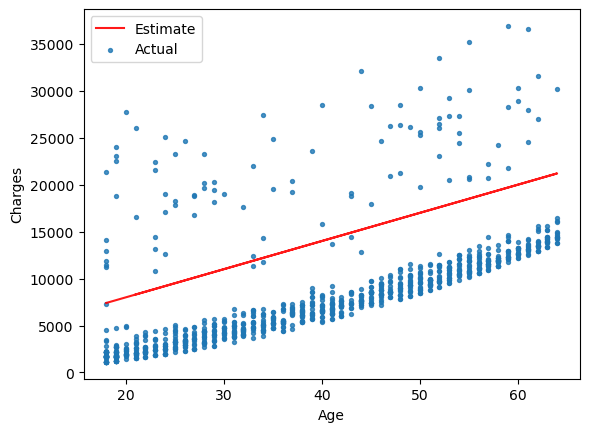

In [10]:
try_parameters(non_smoker_df, 300, 2000)

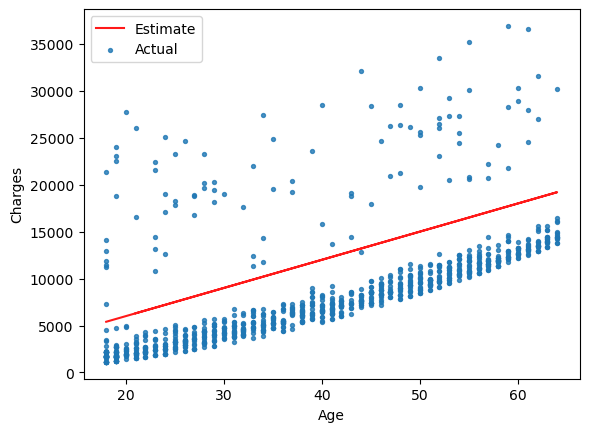

In [12]:
try_parameters(non_smoker_df, 300, 0)

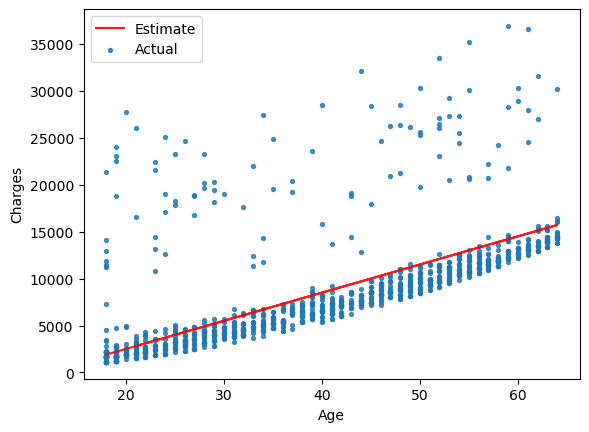

In [15]:
try_parameters(non_smoker_df, 300, -3500)

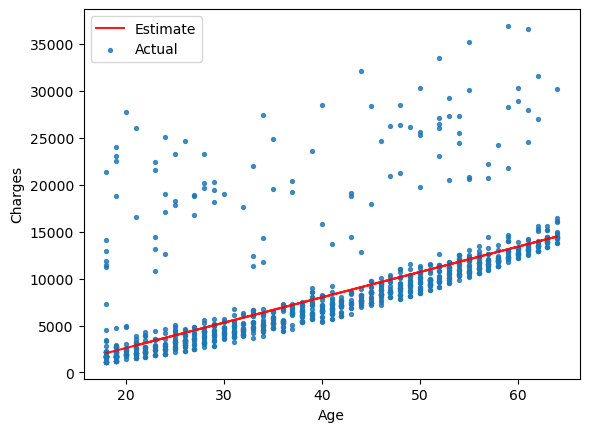

In [26]:
try_parameters(non_smoker_df, 300, -3000)

**Спостереження**

Спочатку я взяла параметри наближені до того, які були в лекції, оскільки побачила, що отриманий кут нахилу близький до того, що потрібно отримати. Але пряма в лекції була зависоко, тому я зменшила параметр 'b' до 2000.

Побачила, що графік все ще високо і поставила замість 'b' 0. Це теж знизило пряму, але все одно вона була все ще досить високо. Пробую від'ємні значення для параметра 'b'. За кілька спроб прийшла до значення в -3000.  

Ідеально було б трохи прогнути ще цю лінію для більш точної моделі, але мені здалось, що з урахуванням аутлаєрів - отримана формула лінійної регресії може бути такою, яка є близькою до хорошого прогнозування данних параметрів.

Як результат отримуємо y = 300 * age - 3000



**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [30]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [38]:
w = 300
b = -3000


In [34]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [35]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4700.736524304107


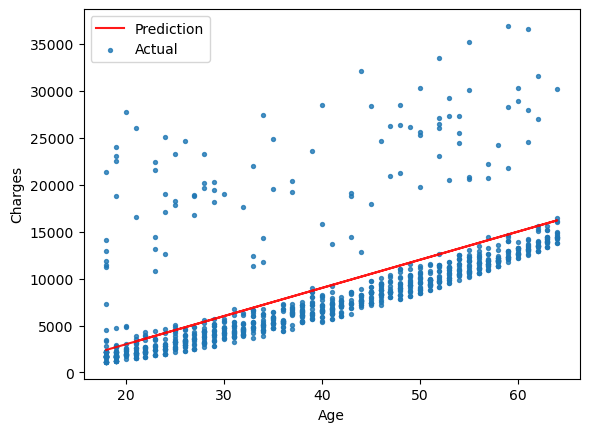

In [39]:
try_parameters(w,b)

RMSE Loss:  4680.269902358397


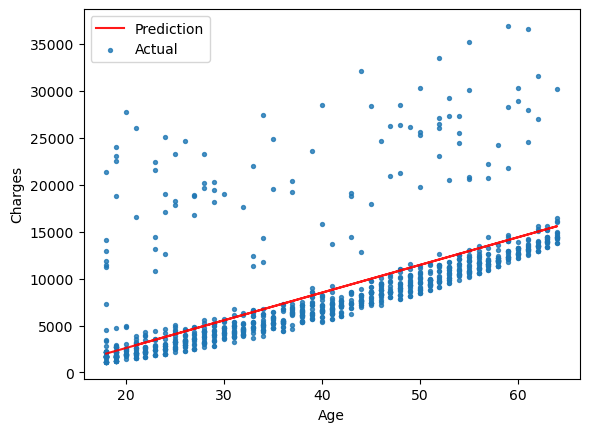

In [55]:
try_parameters(295,-3300)

**Спостереження**

Тут мені стало цікаво підібрати все ж таки параметри з мінімальною середньоквадратичною помилкою і виявилось, що в попередньому завданні обраний варіант на око в попередньому завданні був все ж таки не найоптимальнішим. Ближе до кращої моделі предикту є формула y = 295*age -3300